In [1]:
import pandas as pd
import openpyxl

In [2]:
!pip install openpyxl

# Load the data

In [3]:
col_names_comment = ["video_link","cid","comment_time","likes","replies","comment_IP","comment"]
col_names_video=["key","video_id","video_description","video_topic","video_length","video_link","release_date","release_account","likes","num_comments","archives","shares","sentiment_to_brand"]

li_comments = pd.read_excel("data/Li_Comments.xlsx")
li_video = pd.read_excel("data/Li_Video.xlsx")
aito_comments = pd.read_excel("data/Aito_Comments.xlsx")
aito_video = pd.read_excel("data/Aito_Video.xlsx")
li_comments.columns = col_names_comment
aito_comments.columns = col_names_comment
li_video.columns = col_names_video
aito_video.columns = col_names_video
li_comments=li_comments.dropna()
aito_comments=aito_comments.dropna()


## Data Cleaning

### Delete irrelavant videos

The name of brand Li is a Chinese word. So there is some irrevant videos scraped. It would not take much time to figure out the non-relavant videos mannually since the total videos of Li is 83, which is not very large. By observing the original dataset, the video ids of non-relavant videos are: 6953924024518839593 , 6979613318105353479 ,6724238509927976206,6993153804132781323,7127604715617127684,7096756034928119081,7027705719998713129,7092745278658268454,6804754290553457933,7074903855749811467,7093853232191048997,7104836122911591710,6864048392897694983

In [4]:
irrelavant_ids=[6953924024518839593 , 6979613318105353479 ,6724238509927976206,6993153804132781323,7127604715617127684,7096756034928119081,7027705719998713129,7092745278658268454,6804754290553457933,7074903855749811467,7093853232191048997,7104836122911591710,6864048392897694983]

In [5]:
li_video = li_video[~li_video["video_id"].isin(irrelavant_ids)]


### Text cleaning

here uses re to clean the text

In [6]:
import re

def clean_chinese_text(comment):
   
    # get rid of  empty string
    comment = comment.strip()
    # get rid of @ someboby
    
    comment = re.sub(r'@[^\s，。？！：；“”（）《》、·]+', '', comment)
    # get rid of emojis
    comment = re.sub(r'\[.*?\]', '', comment)
    # get rid of topic signs
    comment = re.sub(r'#.*?(\s|$)', '', comment)
    
    # get rid of Chinese punctuation
    comment = re.sub(r'[^\u4e00-\u9fa5，。？！：；“”（）《》、·\sA-Za-z0-9]', '', comment)
    
    # get rid of non-Chinese text
    # comment = re.sub(r'[^\u4e00-\u9fa5]', '', comment)
    if comment != "":

        return comment
    else:
        return None


li_comments['comment']= li_comments['comment'].map(str).map(clean_chinese_text)
aito_comments['comment'] = aito_comments['comment'].map(str).map(clean_chinese_text)
li_comments=li_comments.dropna()
aito_comments=aito_comments.dropna()
li_video['video_description']= li_video['video_description'].map(str).map(clean_chinese_text)
li_video['video_topic']= li_video['video_topic'].map(str).map(clean_chinese_text)
aito_video['video_description'] = aito_video['video_description'].map(str).map(clean_chinese_text)
aito_video['video_topic'] = aito_video['video_topic'].map(str).map(clean_chinese_text)


# Save the processed data

In [7]:
# Save the cleaned data
#file_path_li = 'Data/cleaned_li_comments.xlsx'
#file_path_li_v = 'Data/cleaned_li_video.xlsx'
#file_path_ai = 'Data/cleaned_aito_comments.xlsx'
#file_path_ai_v = 'Data/cleaned_aito_video.xlsx'


# Save the DataFrame to an Excel file
#li_comments.to_excel(file_path_li, index=False)
#aito_comments.to_excel(file_path_ai,index=False)
#li_video.to_excel(file_path_li_v, index=False)
#aito_video.to_excel(file_path_ai_v, index=False)


# EDA

## Videos Distribution of Aito

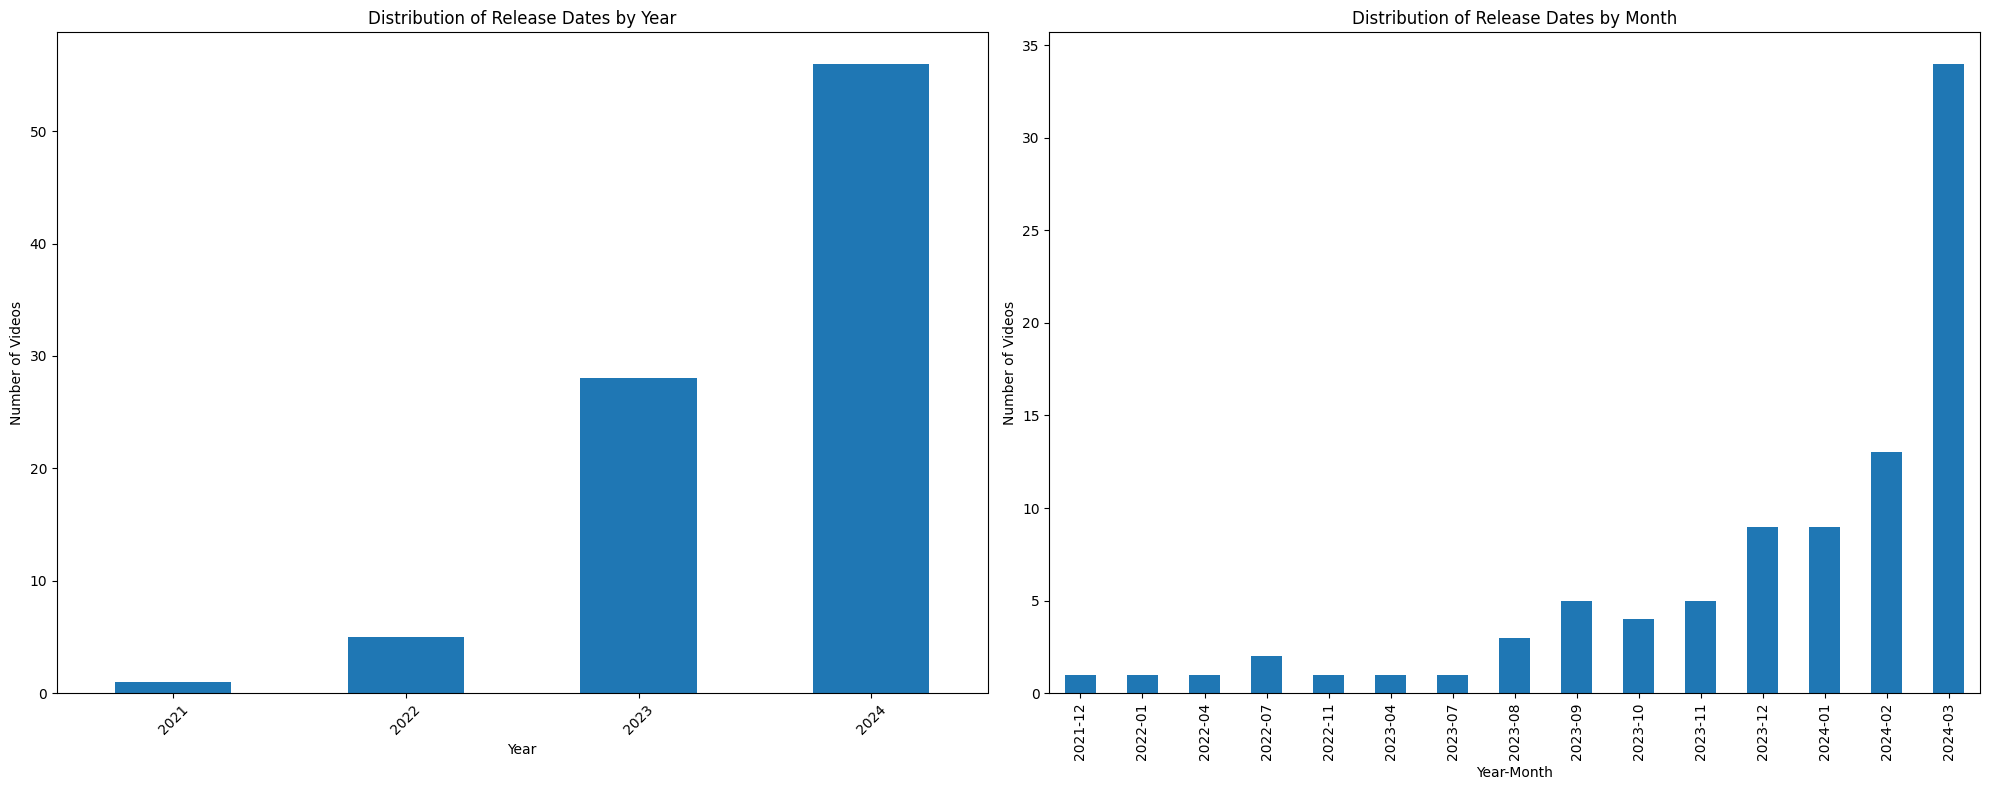

In [8]:
import matplotlib.pyplot as plt



# Convert 'release_date' to datetime format 
aito_video['release_date'] = pd.to_datetime(aito_video['release_date'])

# Extract the year for a yearly distribution analysis
aito_video['release_year'] = aito_video['release_date'].dt.year

# Extract year-month for a monthly distribution analysis
# Creating a period allows for easy sorting and grouping
aito_video['release_month'] = aito_video['release_date'].dt.to_period('M')

# Create a figure with two subplots (side by side)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Yearly distribution plot
aito_video['release_year'].value_counts().sort_index().plot(kind='bar', ax=ax[0])
ax[0].set_title('Distribution of Release Dates by Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Videos')
ax[0].tick_params(axis='x', rotation=45)

# Monthly distribution plot
aito_video['release_month'].value_counts().sort_index().plot(kind='bar', ax=ax[1])
ax[1].set_title('Distribution of Release Dates by Month')
ax[1].set_xlabel('Year-Month')
ax[1].set_ylabel('Number of Videos')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



**Yearly Distribution**: The number of videos released has been increasing each year, with a significant jump from 2022 to 2023, and an even larger increase into 2024. This suggests that either the platform is growing, the creators are producing more content, or possibly both.

**Monthly Distribution**: Looking at the release dates by month, there's a varied distribution of video releases with some months showing higher numbers than others. The end of 2023 and the beginning of 2024, particularly March 2024, show a notable peak in releases. This could be related to seasonal content, marketing campaigns, or other factors that drive content production at specific times of the year.

## Distribution of Aito's videos

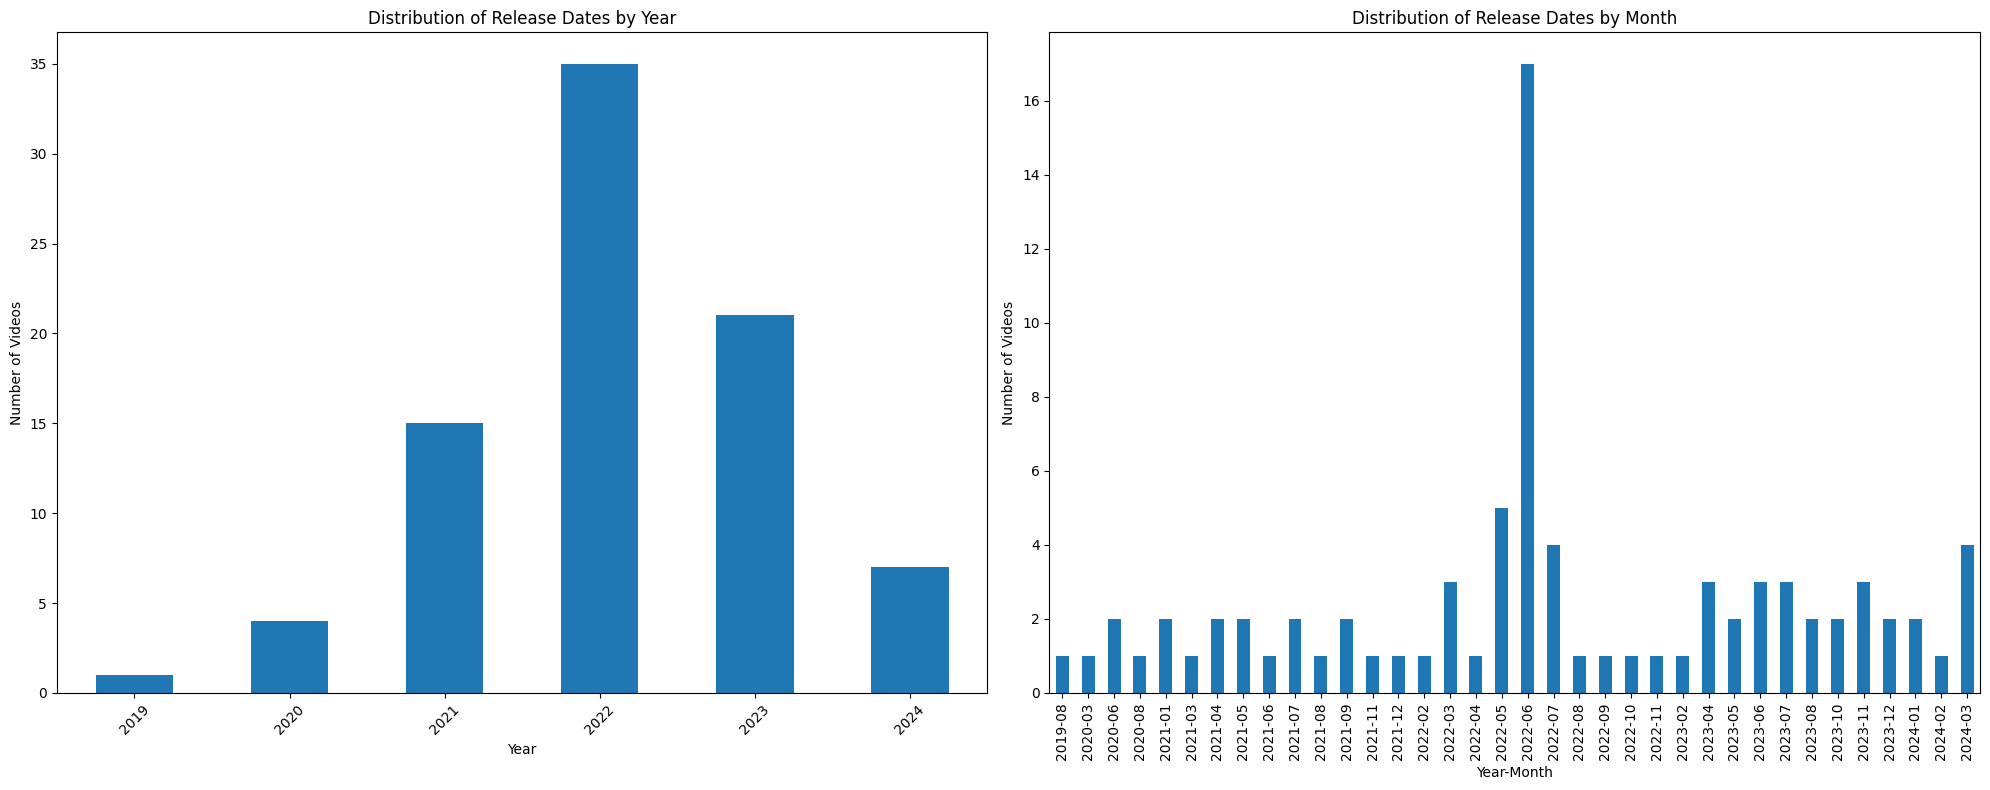

In [9]:
import matplotlib.pyplot as plt



# Convert 'release_date' to datetime format (if not already done)
li_video['release_date'] = pd.to_datetime(li_video['release_date'])

# Extract the year for a yearly distribution analysis
li_video['release_year'] = li_video['release_date'].dt.year

# Extract year-month for a monthly distribution analysis
# Creating a period allows for easy sorting and grouping
li_video['release_month'] = li_video['release_date'].dt.to_period('M')

# Create a figure with two subplots (side by side)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Yearly distribution plot
li_video['release_year'].value_counts().sort_index().plot(kind='bar', ax=ax[0])
ax[0].set_title('Distribution of Release Dates by Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Videos')
ax[0].tick_params(axis='x', rotation=45)

# Monthly distribution plot
li_video['release_month'].value_counts().sort_index().plot(kind='bar', ax=ax[1])
ax[1].set_title('Distribution of Release Dates by Month')
ax[1].set_xlabel('Year-Month')
ax[1].set_ylabel('Number of Videos')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



# Yearly comments of Li and Aito

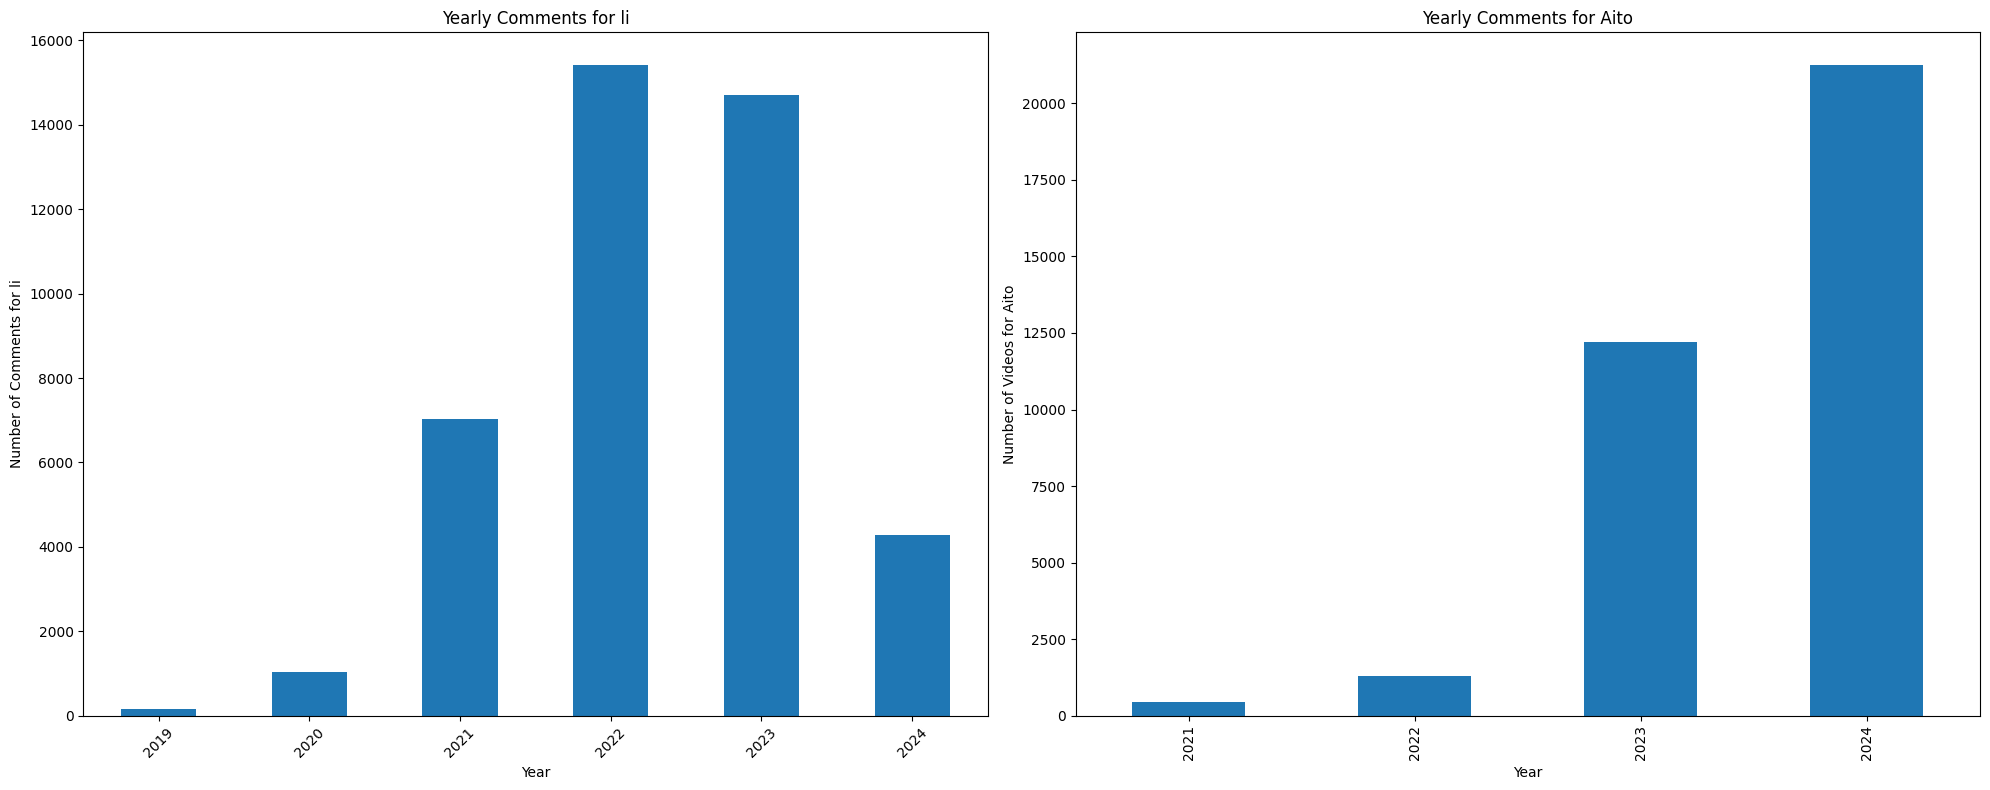

In [10]:

li_comments['comment_time'] = pd.to_datetime(li_comments['comment_time'])
aito_comments['comment_time'] = pd.to_datetime(aito_comments['comment_time'])
# Extract the year for a yearly distribution analysis
li_comments['release_year'] = li_comments['comment_time'].dt.year
aito_comments['release_year'] = aito_comments['comment_time'].dt.year

# Extract year-month for a monthly distribution analysis

# Create a figure with two subplots (side by side)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Yearly distribution plot
li_comments['release_year'].value_counts().sort_index().plot(kind='bar', ax=ax[0])
ax[0].set_title('Yearly Comments for li')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Comments for li')
ax[0].tick_params(axis='x', rotation=45)

# Monthly distribution plot
aito_comments['release_year'].value_counts().sort_index().plot(kind='bar', ax=ax[1])
ax[1].set_title('Yearly Comments for Aito')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Videos for Aito')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



# Stopwords
Use the emerging of 4 most authentive stopwords for Chinese text here

In [11]:
# Paths to your stopwords files
stopwords_files = ['baidu_stopwords.txt', 'cn_stopwords.txt', 'hit_stopwords.txt', 'scu_stopwords.txt']

# Initialize an empty set to hold all the stopwords
all_stopwords = set()

# Loop through each file and add its contents to the stopwords set
for filepath in stopwords_files:
    filepath = 'Stopwords/'+filepath
    with open(filepath, 'r', encoding='utf-8') as f:
        all_stopwords.update([word.strip() for word in f.readlines()])


Chinese has no space between words, here uses jieba to get tokenization the word and generate word cloud.

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/b_/ygk7t19j3nnbyh1h2mg_7wn80000gn/T/jieba.cache
Loading model cost 0.475 seconds.
Prefix dict has been built successfully.


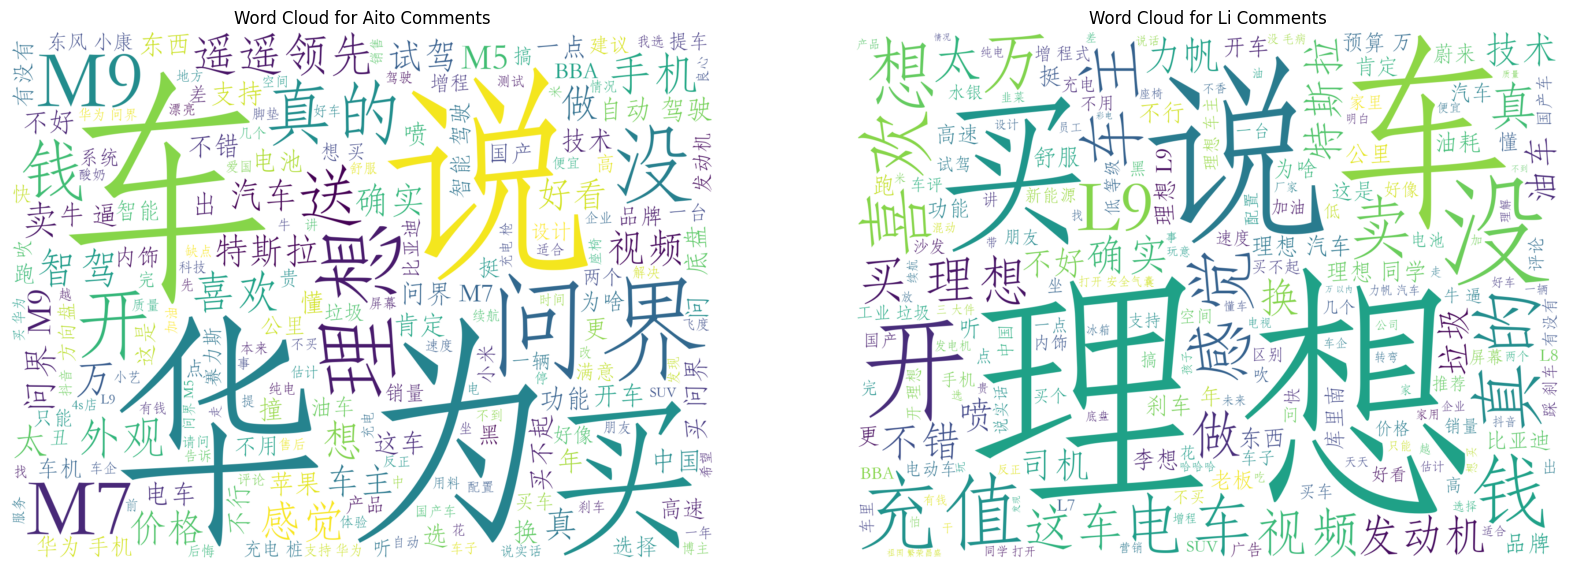

In [12]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'aito_comments' and 'bito_comments' are your DataFrames and they have been properly loaded.
comments_aito = " ".join(aito_comments['comment'].astype(str))
comments_li = " ".join(li_comments['comment'].astype(str))

# Use jieba to segment the Chinese text for both sets of comments
seg_list_aito = jieba.cut(comments_aito, cut_all=False)
segmented_text_aito = " ".join(seg_list_aito)

seg_list_bito = jieba.cut(comments_li, cut_all=False)
segmented_text_bito = " ".join(seg_list_bito)

# Generate word clouds for both sets of segmented text
wordcloud_aito = WordCloud(font_path='STFangSong.ttf', background_color='white',stopwords=all_stopwords,width=800, height=600, scale=2).generate(segmented_text_aito)
wordcloud_bito = WordCloud(font_path='STFangSong.ttf', background_color='white',stopwords=all_stopwords, width=800, height=600, scale=2).generate(segmented_text_bito)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # 1 row, 2 columns

# Display the first word cloud in the first subplot
axes[0].imshow(wordcloud_aito, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud for Aito Comments')

# Display the second word cloud in the second subplot
axes[1].imshow(wordcloud_bito, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud for Li Comments')

plt.show()


Since the text of generating wordcloud is very long, so it is hard to get the english translation. So there is no english wordcloud generated here.

In [13]:
!pip install spacy

# Spacy for NLP analysis

In [20]:
import spacy
import pandas as pd

# Load the SpaCy Chinese model
nlp = spacy.load('zh_core_web_sm')
# Applying the SpaCy model to each row in the DataFrame
li_comments['nlp_comment'] = li_comments['comment'].apply(nlp)



# Extracting POS tags and optionally other features
li_comments['pos_tags'] = li_comments['nlp_comment'].apply(lambda doc: [(token.text, token.pos_) for token in doc])

#  named entities:
li_comments['entities'] = li_comments['nlp_comment'].apply(lambda doc: [(ent.text, ent.label_) for ent in doc.ents])
# Dependency Parsing
li_comments['dependencies'] = li_comments['nlp_comment'].apply(lambda doc: [(token.text, token.dep_, token.head.text) for token in doc])




In [22]:
li_comments

,video_link,cid,comment_time,likes,replies,comment_IP,comment,release_year,nlp_comment,pos_tags,entities,dependencies
0,https://www.douyin.com/video/6724238509927976206,6724315314135789568,2019-08-13 00:17:49,129,0,无,渐强扶弱，拜强欺弱，根本区别再大的博物馆都没用,2019,"(渐强, 扶弱, ，, 拜强, 欺弱, ，, 根本, 区别, 再, 大, 的, 博物馆, 都...","[(渐强, NOUN), (扶弱, VERB), (，, PUNCT), (拜强, VERB...",[],"[(渐强, nmod:tmod, 扶弱), (扶弱, dep, 没用), (，, punct..."
1,https://www.douyin.com/video/6724238509927976206,6724307710353139712,2019-08-12 23:48:15,274,2,无,英国留学让你更坚定认为自己是英国人,2019,"(英国, 留学, 让, 你, 更, 坚定, 认为, 自己, 是, 英国人)","[(英国, PROPN), (留学, VERB), (让, VERB), (你, PRON)...","[(英国, GPE), (英国人, NORP)]","[(英国, nsubj, 留学), (留学, ROOT, 留学), (让, conj, 留学..."
2,https://www.douyin.com/video/6724238509927976206,6726852199668480000,2019-08-19 20:22:10,107,0,无,老爷子也是一个伟人,2019,"(老爷子, 也, 是, 一个, 伟人)","[(老爷子, NOUN), (也, ADV), (是, VERB), (一个, NUM), ...",[],"[(老爷子, nsubj, 伟人), (也, advmod, 伟人), (是, cop, 伟..."
3,https://www.douyin.com/video/6724238509927976206,6724309456349589504,2019-08-12 23:55:03,214,2,无,李光耀 要有认祖的初心,2019,"(李光耀, 要, 有, 认祖, 的, 初心)","[(李光耀, PROPN), (要, VERB), (有, VERB), (认祖, NOUN...","[(李光耀, PERSON)]","[(李光耀, nsubj, 有), (要, xcomp, 有), (有, dep, 初心),..."
4,https://www.douyin.com/video/6724238509927976206,6724324047796400128,2019-08-13 00:51:43,535,3,无,看不明白吧，这回家多少是华人，确不是中国的铁盟。值得研究。,2019,"(看, 不, 明白, 吧, ，, 这, 回家, 多少, 是, 华人, ，, 确, 不是, 中...","[(看, VERB), (不, ADV), (明白, VERB), (吧, PART), (...","[(华人, NORP), (中国, GPE)]","[(看, ROOT, 看), (不, dep, 看), (明白, dep, 看), (吧, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
47280,https://www.douyin.com/video/7350480407307078927,7350522030523710464,2024-03-26 12:19:41,2,0,湖北,理想的,2024,"(理想, 的)","[(理想, VERB), (的, PART)]",[],"[(理想, ROOT, 理想), (的, case, 理想)]"
47281,https://www.douyin.com/video/7350480407307078927,7350527617931410432,2024-03-26 12:41:19,2,0,河南,漂亮的豪车,2024,"(漂亮, 的, 豪车)","[(漂亮, VERB), (的, PART), (豪车, NOUN)]",[],"[(漂亮, amod, 豪车), (的, mark, 漂亮), (豪车, ROOT, 豪车)]"
47282,https://www.douyin.com/video/7350480407307078927,7350521168641030144,2024-03-26 12:16:20,6,0,湖南,现在的车越来越理想化了，科技含量高,2024,"(现在, 的, 车, 越来越, 理想化, 了, ，, 科技, 含量, 高)","[(现在, NOUN), (的, PART), (车, NOUN), (越来越, ADV),...",[],"[(现在, nmod, 车), (的, case, 现在), (车, nsubj, 理想化)..."
47286,https://www.douyin.com/video/7350480407307078927,7350523010317200384,2024-03-26 12:23:27,2,0,福建,霸气,2024,(霸气),"[(霸气, VERB)]",[],"[(霸气, ROOT, 霸气)]"


In [15]:
aito_comments['nlp_comment'] = aito_comments['comment'].apply(nlp)



# Extracting POS tags and optionally other features
aito_comments['pos_tags'] = aito_comments['nlp_comment'].apply(lambda doc: [(token.text, token.pos_) for token in doc])
# Dependency Parsing
li_comments['dependencies'] = li_comments['nlp_comment'].apply(lambda doc: [(token.text, token.dep_, token.head.text) for token in doc])

#  named entities:
aito_comments['entities'] = aito_comments['nlp_comment'].apply(lambda doc: [(ent.text, ent.label_) for ent in doc.ents])


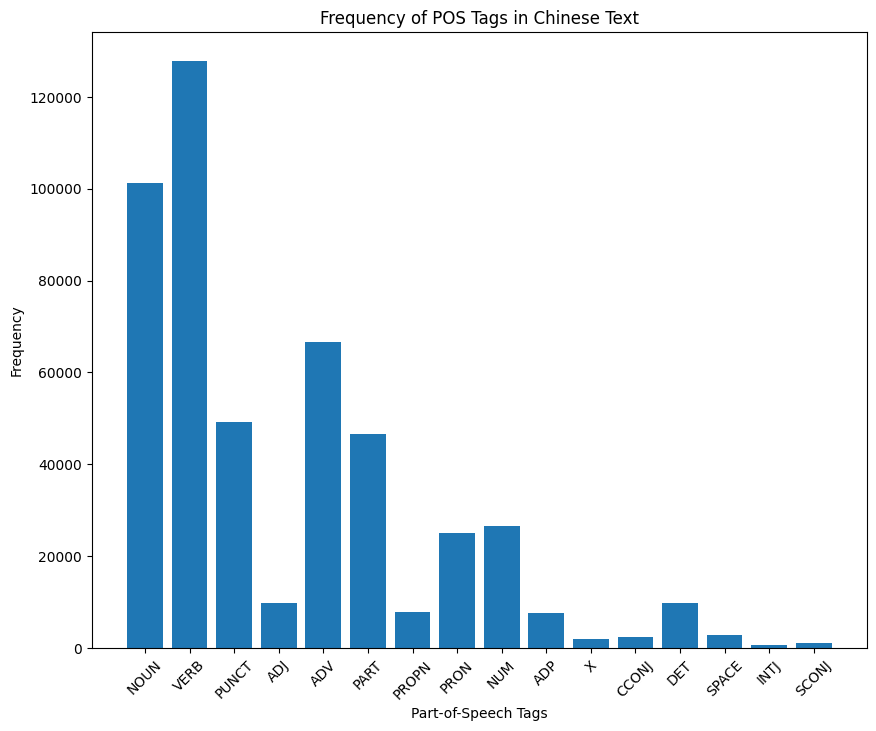

In [17]:
from collections import Counter
all_pos_tags_li = [pos for sublist in li_comments['pos_tags'] for _, pos in sublist]

# Count the frequency of each POS tag
pos_counts = Counter(all_pos_tags_li)

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.bar(pos_counts.keys(), pos_counts.values())

plt.title('Frequency of POS Tags for Li')
plt.xlabel('Part-of-Speech Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


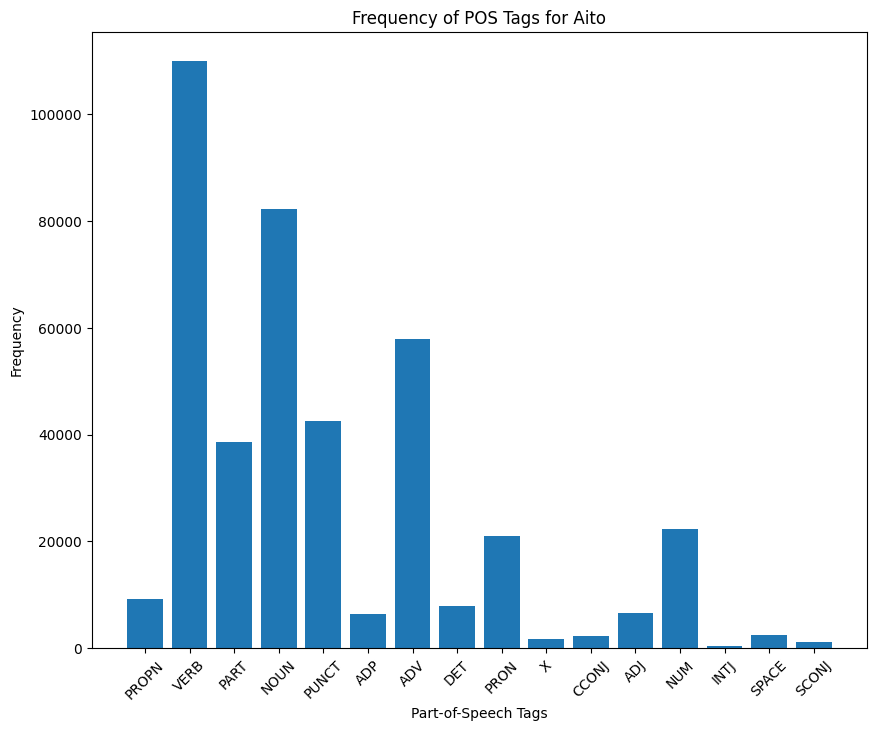

In [18]:
all_pos_tags_aito = [pos for sublist in aito_comments['pos_tags'] for _, pos in sublist]

# Count the frequency of each POS tag
pos_counts = Counter(all_pos_tags_aito)

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.bar(pos_counts.keys(), pos_counts.values())

plt.title('Frequency of POS Tags for Aito')
plt.xlabel('Part-of-Speech Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# Show example depencies 

In [24]:
from spacy import displacy
from IPython.display import HTML


# Create a function to visualize dependencies of a single document
def visualize_dependency(doc):
    # Render the dependency tree and store it as HTML
    html = displacy.render(doc, style='dep', page=True)

    return html

for doc in li_comments['nlp_comment'].head():
    html = visualize_dependency(doc)
    # Display in Jupyter notebook, if you are using one
    display(HTML(html))


<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

In [25]:
from spacy import displacy
from IPython.display import HTML


# Create a function to visualize dependencies of a single document
def visualize_dependency(doc):
    # Render the dependency tree and store it as HTML
    html = displacy.render(doc, style='dep', page=True)

    return html

for doc in aito_comments['nlp_comment'].head():
    html = visualize_dependency(doc)
    # Display in Jupyter notebook, if you are using one
    display(HTML(html))


<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>